<a href="https://colab.research.google.com/github/asepmuhidin/research/blob/master/cla_ofstroke_with_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dfile='healthcare-dataset-stroke-data.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(dfile)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#impute data null untuk kolom bmi dengan nilai rata-rata
avg_bmi=df.bmi.mean()
avg_bmi

28.893236911794666

In [10]:
df.bmi.fillna(avg_bmi,inplace=True)

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [15]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [18]:
#buat data kategori menjadi one hot encoding
dataset=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [19]:
dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Female                   5110 non-null   uint8  
 8   gender_Male                     5110 non-null   uint8  
 9   gender_Other                    5110 non-null   uint8  
 10  ever_married_No                 5110 non-null   uint8  
 11  ever_married_Yes                5110 non-null   uint8  
 12  work_type_Govt_job              51

In [23]:
#Membagi dataset menjadi fitur dan class
X=dataset.drop(columns='stroke') #fiturs
y=dataset.stroke #class

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

In [25]:
#membuat model klasifikasi dengan KNN (K Nearest Neighbors)
knn=KNeighborsClassifier()

In [26]:
#Menerapkan dataset ke model
knn.fit(X,y)

KNeighborsClassifier()

In [28]:
#Lihat score model
predict=knn.predict(X)
score=classification_report(y,predict)
print(score)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.71      0.02      0.04       249

    accuracy                           0.95      5110
   macro avg       0.83      0.51      0.51      5110
weighted avg       0.94      0.95      0.93      5110



## Membagi dataset menjadi data train 70% dan test 30%

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y,random_state=18)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3577, 22), (1533, 22), (3577,), (1533,))

In [32]:
knn_1=KNeighborsClassifier()
knn_1.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
predict_1=knn_1.predict(x_test)
score_1=classification_report(y_test,predict_1)
print(score_1)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



# Analisa data kelas tidak sebanding (imbalance class)

In [35]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

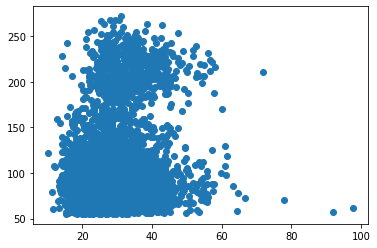

In [41]:
plt.scatter(df.bmi,df.avg_glucose_level)
plt.show()

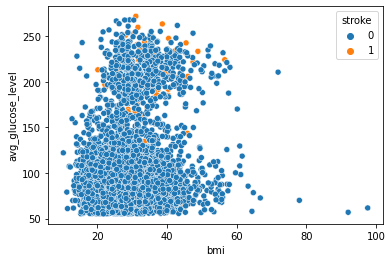

In [43]:
sns.scatterplot(df,x='bmi',y='avg_glucose_level',hue='stroke');

In [40]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
